In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
excel_file_path = "./pizza_sales/Data Model - Pizza Sales.xlsx"
# Read Excel file into a Pandas DataFrame
df = pd.read_excel(excel_file_path, engine='openpyxl')

# Display the DataFrame
print(df.head(3))

   order_details_id  order_id       pizza_id  quantity order_date order_time  \
0                 1         1     hawaiian_m         1 2015-01-01   11:38:36   
1                 2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2                 3         2  five_cheese_l         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   

                                   pizza_ingredients                pizza_name  
0           Sliced Ham, Pineapple, Mozzarella Cheese        The Hawaiian Pizza  
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...  The Classic Deluxe Pizza  
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...     The Five Cheese Pizza  


In [5]:
#Informations de base
#a)
print("Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de données ?")
pizza_id_counts = df['pizza_id'].value_counts()
print(f"Il y a {len(pizza_id_counts)} pizzas uniques dans le jeu de données.")

#b)
print()
print("Combien de commandes uniques (order_id distincts) figurent dans le jeu de données ?")
order_id_counts = df['order_id'].value_counts()
print(f"Il y a {len(order_id_counts)} commandes uniques dans le jeu de données.")


Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de données ?
Il y a 91 pizzas uniques dans le jeu de données.

Combien de commandes uniques (order_id distincts) figurent dans le jeu de données ?
Il y a 21350 commandes uniques dans le jeu de données.


In [6]:
#Analyse temporelle
#a)
print("Quelle est la plage de dates dans le jeu de données ?")
date_range_start = df['order_date'].min().date()
date_range_end = df['order_date'].max().date()
print(f'Plage de dates: {date_range_start} à {date_range_end}')

#b)
print()
print("Combien de commandes ont été passées chaque jour  ?")
daily_orders = df.groupby('order_date')['quantity'].sum()
print("Nombre de commandes par jour :")
print(daily_orders)
print()
#c)
print("Quelle est la durée moyenne pour traiter une commande ?")
print(f"Nous n'avons aucun moyen de calculer correctement la durée moyenne pour traiter une commande.")



Quelle est la plage de dates dans le jeu de données ?
Plage de dates: 2015-01-01 à 2015-12-31

Combien de commandes ont été passées chaque jour  ?
Nombre de commandes par jour :
order_date
2015-01-01    162
2015-01-02    165
2015-01-03    158
2015-01-04    106
2015-01-05    125
             ... 
2015-12-27     89
2015-12-28    102
2015-12-29     80
2015-12-30     82
2015-12-31    178
Name: quantity, Length: 358, dtype: int64

Quelle est la durée moyenne pour traiter une commande ?
Nous n'avons aucun moyen de calculer correctement la durée moyenne pour traiter une commande.


In [7]:
#Analyse de la quantité
#a)
print("Quelle est la quantité moyenne de pizzas commandées ?")
print(df.groupby('order_id')['quantity'].sum().mean())

#b)
print()
print("Les tailles de pizzas les plus fréquemment commandées :")
print(df.pizza_size.value_counts())
print("Quelle est la taille de pizza la plus fréquemment commandée ?")
print(df.pizza_size.value_counts().index[0])

#c)
print()
print("Les catégories de pizzas les plus fréquemment commandées :")
print(df.pizza_category.value_counts())
print("Quelle est la catégorie de pizza la plus fréquemment commandée ?")
print(df.pizza_category.value_counts().index[0])




Quelle est la quantité moyenne de pizzas commandées ?
2.321967213114754

Les tailles de pizzas les plus fréquemment commandées :
pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64
Quelle est la taille de pizza la plus fréquemment commandée ?
L

Les catégories de pizzas les plus fréquemment commandées :
pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64
Quelle est la catégorie de pizza la plus fréquemment commandée ?
Classic


In [8]:
#Analyse des prix
#a)
print("Quel est le prix unitaire moyen des pizzas ?")
print(df.apply(lambda x: x['total_price'] / x['quantity'], axis=1).mean().round(3))

#b)
print()
print("Quel est le prix total moyen d'une commande ?")
print(df.groupby('order_id')['total_price'].sum().mean().round(3))

#c)
print()
print("Quelle pizza a le prix unitaire le plus élevé ?")
print(df[df.unit_price == df.unit_price.max()].iloc[0]['pizza_name'])

Quel est le prix unitaire moyen des pizzas ?
16.494

Quel est le prix total moyen d'une commande ?
38.307

Quelle pizza a le prix unitaire le plus élevé ?
The Greek Pizza


In [9]:
#Répartition par taille et catégorie :
#a)
print("Combien de pizzas de chaque taille ont été vendues ?")
print(df.groupby('pizza_size')['quantity'].sum())

#b)
print()
print("Combien de pizzas y a-t-il dans chaque catégorie ?")
print(df.groupby('pizza_category')['pizza_name'].nunique())

Combien de pizzas de chaque taille ont été vendues ?
pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

Combien de pizzas y a-t-il dans chaque catégorie ?
pizza_category
Chicken    6
Classic    8
Supreme    9
Veggie     9
Name: pizza_name, dtype: int64


In [10]:
#Analyse des ingrédients :

#a)
print("Quels sont les ingrédients les plus couramment utilisés dans toutes les pizzas ?")
df2 =pd.DataFrame()
df2['ingredients_list'] = df['pizza_ingredients'].str.split(',')
all_ingredients = [ingredient.strip() for sublist in df2['ingredients_list'] for ingredient in sublist]
ingredient_counts = pd.Series(all_ingredients).value_counts()
print(f"Les ingrédients les plus couramment utilisés dans toutes les pizzas sont :\n{ingredient_counts.head(10)}")

#b)
def contains_ing(df,df2, target):
    df2['contains_target_ingredient'] = df['pizza_ingredients'].str.contains(target, case=False)
    pizzas_with_target = df2['contains_target_ingredient'].sum()
    return f"Nombre de pizzas contenant {target} : {pizzas_with_target}"
print()
print("Combien de pizzas contiennent un ingrédient spécifique (par exemple, pepperoni, champignons) ?")
print(contains_ing(df,df2, "pepperoni"))
print(contains_ing(df,df2, "mushrooms"))




Quels sont les ingrédients les plus couramment utilisés dans toutes les pizzas ?
Les ingrédients les plus couramment utilisés dans toutes les pizzas sont :
Garlic               27422
Tomatoes             26601
Red Onions           19547
Red Peppers          16284
Mozzarella Cheese    10333
Pepperoni            10300
Spinach              10012
Mushrooms             9624
Chicken               8443
Capocollo             6572
Name: count, dtype: int64

Combien de pizzas contiennent un ingrédient spécifique (par exemple, pepperoni, champignons) ?
Nombre de pizzas contenant pepperoni : 10300
Nombre de pizzas contenant mushrooms : 9624


Quelle est la répartition du nombre de pizzas par commande ?
La répartition du nombre de pizzas par commande :
pizza_name
1     8201
2     6196
3     3325
4     2888
5      144
6       75
7       75
8       83
9       65
10      59
11      69
12      71
13      52
14      38
15       7
21       2
Name: count, dtype: int64

Quelle est la répartition des prix totaux pour les commandes ?
Aperçu des prix totaux pour les 5 premières commandes :
order_id
1    13.25
2    92.00
3    37.25
4    16.50
5    16.50
Name: total_price, dtype: float64

La répartition des prix totaux pour les commandes :
count    21350.000000
mean        38.307262
std         30.648197
min          9.750000
25%         17.950000
50%         32.500000
75%         49.500000
max        444.200000
Name: total_price, dtype: float64



Text(0, 0.5, 'Fréquence')

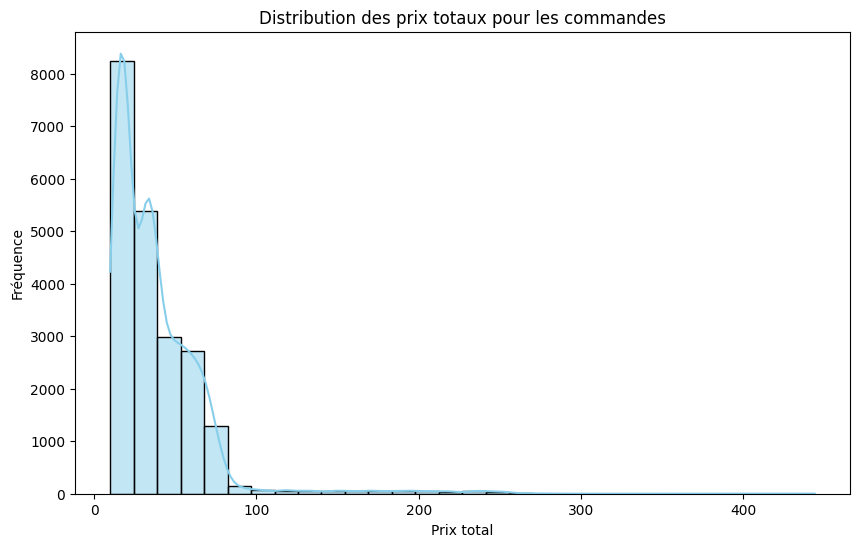

In [11]:
#Détails de la commande :

#a)
print("Quelle est la répartition du nombre de pizzas par commande ?")
pizzas_per_order = df.groupby('order_id')['pizza_name'].count()
print("La répartition du nombre de pizzas par commande :")
print(pizzas_per_order.value_counts().sort_index())

#b)
print()
print("Quelle est la répartition des prix totaux pour les commandes ?")
total_prices_per_order = df.groupby('order_id')['total_price'].sum()
print("Aperçu des prix totaux pour les 5 premières commandes :")
print(total_prices_per_order.head(5))
print()
print("La répartition des prix totaux pour les commandes :")
print(total_prices_per_order.describe())
print()
plt.figure(figsize=(10, 6))
sns.histplot(total_prices_per_order, bins=30, kde=True, color='skyblue')
plt.title('Distribution des prix totaux pour les commandes')
plt.xlabel('Prix total')
plt.ylabel('Fréquence')


Quel est le chiffre d'affaires quotidien ?

Le chiffre d'affaires quotidien :
 order_date
2015-01-01    2713.85
2015-01-02    2731.90
2015-01-03    2662.40
2015-01-04    1755.45
2015-01-05    2065.95
               ...   
2015-12-27    1419.00
2015-12-28    1637.20
2015-12-29    1353.25
2015-12-30    1337.80
2015-12-31    2916.00
Name: total_price, Length: 358, dtype: float64

Y a-t-il une corrélation entre l'heure de la journée et le total de la commande ?


Text(0, 0.5, 'Total de la commande')

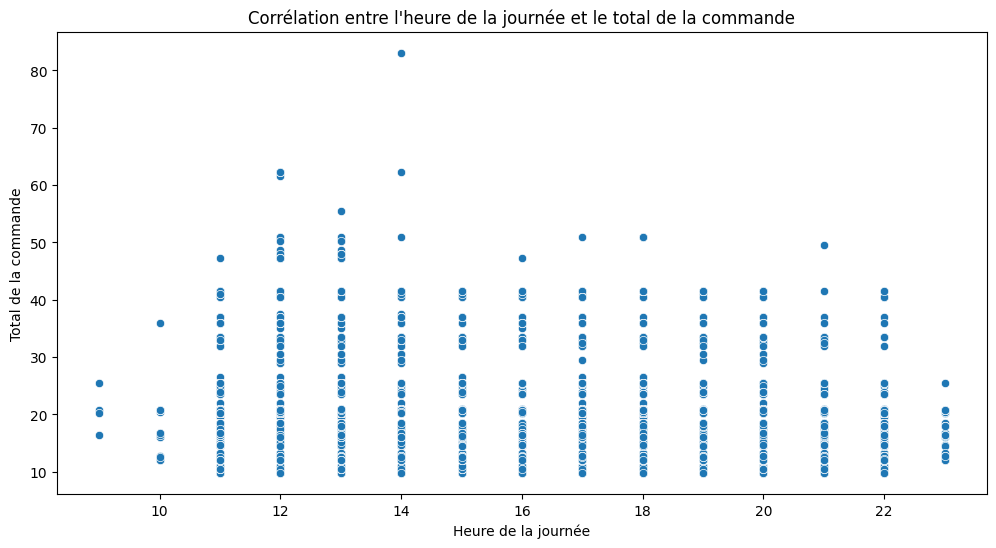

In [13]:
#Analyse du chiffre d’affaires en fonction du temps :
#a)
print("Quel est le chiffre d'affaires quotidien ?")
print()
df['order_date'] = pd.to_datetime(df['order_date'])
chiffre_affaires_quotidien = df.groupby(df['order_date'].dt.date)['total_price'].sum()
print(f"Le chiffre d'affaires quotidien :\n {chiffre_affaires_quotidien}")

#b)
print()
print("Y a-t-il une corrélation entre l'heure de la journée et le total de la commande ?")
df['hour_of_day'] = df['order_time'].apply(lambda x: x.hour if pd.notnull(x) else x)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='hour_of_day', y='total_price', data=df)
plt.title("Corrélation entre l'heure de la journée et le total de la commande")
plt.xlabel("Heure de la journée")
plt.ylabel("Total de la commande")


ANOVA Test:
F-statistic: 5.597737321228825
p-value: 5.8038244818528214e-11
Il existe une différence significative dans les prix totaux selon les périodes de la journée.


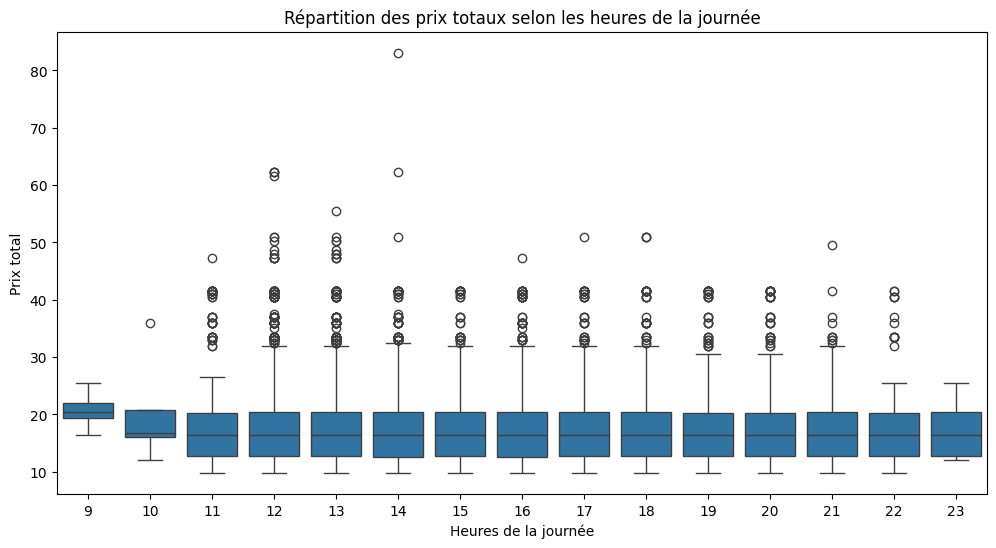

In [28]:
######## ANOVA
# Boxplots 
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour_of_day', y='total_price', data=df)
plt.title("Répartition des prix totaux selon les heures de la journée")
plt.xlabel("Heures de la journée")
plt.ylabel("Prix total")

# ANOVA test
import scipy
f_statistic, p_value = scipy.stats.f_oneway(*[group['total_price'] for name, group in df.groupby('hour_of_day')])
print("ANOVA Test:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Il existe une différence significative dans les prix totaux selon les périodes de la journée.")
else:
    print("Il n'y a pas de différence significative dans les prix totaux selon les périodes de la journée.")


In [15]:
#Pizzas populaires :

#a)
print("Quelles sont les 5 pizzas les plus commandées en quantité ?")
print()
top_pizzas = df.groupby('pizza_name')['quantity'].sum()
# Trier les pizzas par quantité commandée de manière décroissante
top_pizzas = top_pizzas.sort_values(ascending=False)
# Afficher les 5 pizzas les plus commandées
print("Les 5 pizzas les plus commandées en quantité :")
print(top_pizzas.head(5))

#b)
print()
print("Quelles sont les 5 pizzas les plus commandées en termes de chiffre d'affaires ?")
# Grouper par nom de pizza et obtenir la somme du chiffre d'affaires
top_pizzas_revenue = df.groupby('pizza_name')['total_price'].sum()
top_pizzas_revenue = top_pizzas_revenue.sort_values(ascending=False)
print("Les 5 pizzas les plus commandées en termes de chiffre d'affaires :")
print(top_pizzas_revenue.head(5))


Quelles sont les 5 pizzas les plus commandées en quantité ?

Les 5 pizzas les plus commandées en quantité :
pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

Quelles sont les 5 pizzas les plus commandées en termes de chiffre d'affaires ?
Les 5 pizzas les plus commandées en termes de chiffre d'affaires :
pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float64


Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?
Répartition du chiffre d'affaires pour chaque taille de pizza :
pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

Quelle est la répartition du chiffre d'affaires pour chaque catégorie de pizza ?


Text(0, 0.5, "Chiffre d'affaires")

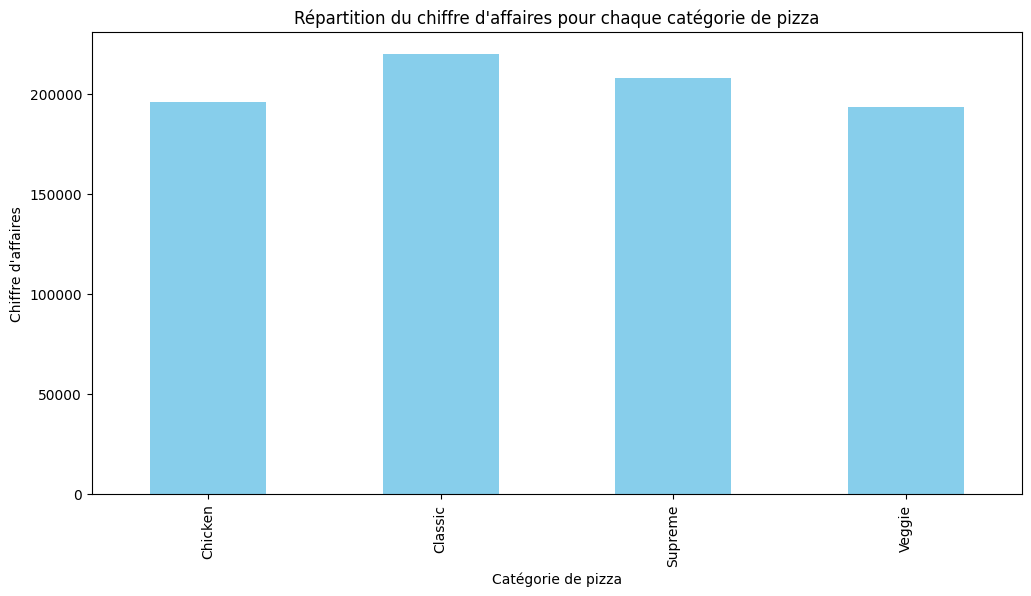

In [30]:
# Chiffre d'affaires par taille et catégorie :
#a)
print("Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?")
# grouper par taille de pizza et obtenir la somme du chiffre d'affaires
revenue_by_size = df.groupby('pizza_size')['total_price'].sum()
print("Répartition du chiffre d'affaires pour chaque taille de pizza :")
print(revenue_by_size)

#b)
print()
print("Quelle est la répartition du chiffre d'affaires pour chaque catégorie de pizza ?")
# grouper par catégorie de pizza et obtenir la somme du chiffre d'affaires
revenue_by_category = df.groupby('pizza_category')['total_price'].sum()
#plot
plt.figure(figsize=(12, 6))
revenue_by_category.plot(kind='bar', color='skyblue')
plt.title("Répartition du chiffre d'affaires pour chaque catégorie de pizza")
plt.xlabel("Catégorie de pizza")
plt.ylabel("Chiffre d'affaires")



In [ ]:
#Corrélation entre prix et quantité :
#a)
print("Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?")
#b)
print()
print("Quel est le prix unitaire moyen pour différentes tailles de pizza ?")
